<a href="https://colab.research.google.com/github/TillVollmer5/DSF-FS2022-Till-Vollmer/blob/main/CodingTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 2

- Deadline (upload to Ilias): 2022-05-15 24:00
- Solutions in lecture on 2022-05-18
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples


## Subtasks (maximum 12.5 points)

- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points] 
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points] 
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

Work in teams and have fun ! 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.filters as skf
import skimage.morphology as skm
!pip install pillow_heif
from PIL import Image
import pillow_heif
import cv2

     |████████████████████████████████| 13.1 MB 4.4 MB/s 


# Part 1

Import of images from google drive and conversion to png

In [4]:
from google.colab import drive
drive.mount('/content/drive')

for i in range(5379, 5393, 1):
  url_pre = '/content/drive/MyDrive/DSF/Images/'
  url_im_name = ''.join(['IMG_', str(i), '.HEIC'])

  print(url_im_name)
  heif_file = pillow_heif.read(url_pre+url_im_name)
  image = Image.frombytes(heif_file.mode,heif_file.size,heif_file.data,"raw",)
  url_im_name = url_im_name.split('.')[0]+'.png'
  image.save(url_pre+url_im_name, format="png")
 

Mounted at /content/drive
IMG_5379.HEIC
IMG_5380.HEIC
IMG_5381.HEIC
IMG_5382.HEIC
IMG_5383.HEIC
IMG_5384.HEIC
IMG_5385.HEIC
IMG_5386.HEIC
IMG_5387.HEIC
IMG_5388.HEIC
IMG_5389.HEIC
IMG_5390.HEIC
IMG_5391.HEIC
IMG_5392.HEIC


# Part 2

Image processing as preparation for the Part 3 with spot counting. First one is only to test on one image, second one does the processing for all images.

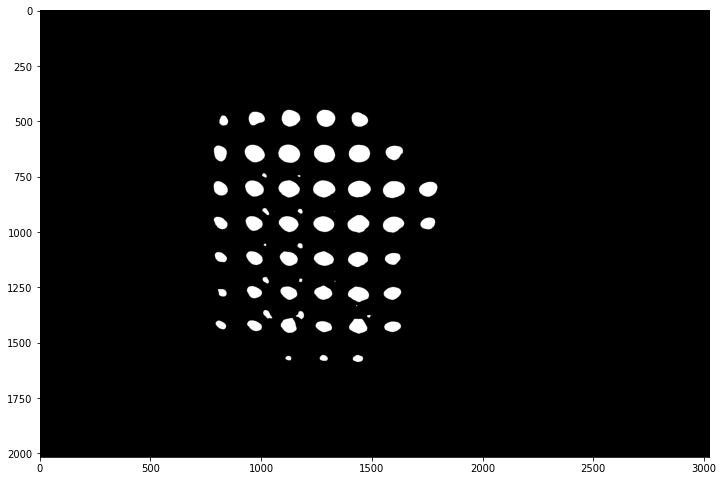

In [85]:
url_pre = '/content/drive/MyDrive/DSF/Images/'
url_name = 'IMG_5379.png'
imageRGB  = io.imread(url_pre+url_name)
image = imageRGB[:,:,2]
#resizing
image = image[image.shape[0]//2:image.shape[0],:]
#filtering
image_mean = skf.median(image,selem=skm.disk(20))
#thresholding
threshold_manual = 55
image_threshold = image_mean<threshold_manual
url_im_name = url_im_name.split('.')[0]+'.png'
plt.figure(figsize=(12, 12))
plt.imshow(image_threshold, cmap ='gray')
plt.show()

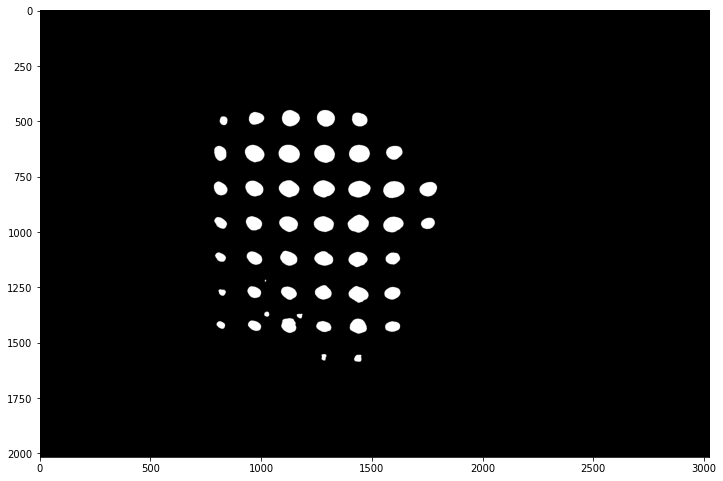

In [ ]:
for i in range(5379, 5393, 1):
  url_pre = '/content/drive/MyDrive/DSF/Images/'
  url_im_name = ''.join(['IMG_', str(i), '.png'])
  imageRGB  = io.imread(url_pre+url_im_name)
  image = imageRGB[:,:,2]
  #resizing
  image = image[image.shape[0]//2:image.shape[0],:]
  #filtering
  image_mean = skf.median(image,selem=skm.disk(25))
  #thresholding
  threshold_manual = 55
  image_threshold = image_mean<threshold_manual
  plt.figure(figsize=(12, 12))
  plt.imshow(image_threshold, cmap ='gray')
  plt.show()

# Part 3

Spot counting done with cv2 (source: https://www.geeksforgeeks.org/count-number-of-object-using-python-opencv/), the image processing was done differently to the previous task, as i was not able to make it work with these figures from part 2.

In [84]:
url_pre = '/content/drive/MyDrive/DSF/Images/'
url_name = 'IMG_5379.png' 
image = cv2.imread(url_pre+url_name)
image = image[image.shape[0]//2:image.shape[0],:]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray') 
blur = cv2.GaussianBlur(gray, (11, 11), 0)
#plt.imshow(blur, cmap='gray')
canny = cv2.Canny(blur, 40, 250, 3) #threshoold was addapted, reflections in the middle of the different spots on the assay were counted, leading to problems with the lower rows of the assay.
#plt.imshow(canny, cmap='gray')
dilated = cv2.dilate(canny, (1, 1), iterations=0)
#plt.imshow(dilated, cmap='gray')
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
#plt.imshow(rgb) 
 
print("spots in the image : ", len(cnt))

spots in the image :  42


In [80]:
for i in range(5379, 5393, 1):
  url_pre = '/content/drive/MyDrive/DSF/Images/'
  url_im_name = ''.join(['IMG_', str(i), '.png'])
  image = cv2.imread(url_pre+url_im_name)
  image = image[image.shape[0]//2:image.shape[0],:]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #plt.imshow(gray, cmap='gray') 
  blur = cv2.GaussianBlur(gray, (11, 11), 0)
  #plt.imshow(blur, cmap='gray')
  canny = cv2.Canny(blur, 40, 250, 3) #threshoold was addapted, reflections in the middle of the different spots on the assay were counted, leading to problems with the lower rows of the assay.
  #the function cv2.threshold(blur,...,...,cv2.THRESH_BINARY) only showed an error, which would have allowed similar results as the previous parts and would lead to better results
  #plt.imshow(canny, cmap='gray')
  dilated = cv2.dilate(canny, (1, 1), iterations=0)
  #plt.imshow(dilated, cmap='gray')
  (cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
  #plt.imshow(rgb) 
  print('spots in the image', url_im_name,' : ', len(cnt))

spots in the image IMG_5379.png  :  42
spots in the image IMG_5380.png  :  37
spots in the image IMG_5381.png  :  54
spots in the image IMG_5382.png  :  74
spots in the image IMG_5383.png  :  37
spots in the image IMG_5384.png  :  13
spots in the image IMG_5385.png  :  73
spots in the image IMG_5386.png  :  59
spots in the image IMG_5387.png  :  42
spots in the image IMG_5388.png  :  59
spots in the image IMG_5389.png  :  37
spots in the image IMG_5390.png  :  46
spots in the image IMG_5391.png  :  39
spots in the image IMG_5392.png  :  55


As only reflections in the liquid of the assays was taken in to consideration, the counted values showed large inacuracy when compared to the correct values. This was the best method that i was able to get to work, other ways only yielded word or no result at all. Better image processing using cv.2 would allow for better results, as the threshold would result in similar outcome to the methode described in notebook 11 (using the methode form notebook 11 only showed proplems which i was not able to resolve). This would lead to a mask, that would show the white areas (hence only filled/colored assays would be marked instead of the reflections)  